In [4]:
# K-NEAREST NEIGHBOURS:

In [6]:
# Importing all the necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
# Data Preparation:

In [10]:
df=pd.read_csv('Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [12]:
 # Exploratory Data Analysis (EDA):

In [14]:
df.shape

(101, 18)

In [16]:
# Summary Statistics:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0


In [18]:
# Checking for missing values:
# There are no missing values found.
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [129]:
# Drop animal name variable as it wont play a role in the model:
df=df.drop('animal name',axis='columns')

In [131]:
# Target Variable is Type:
# 7 types of animals totally:
df.type.value_counts()

type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64

In [133]:
# dtypes: float64(9), int64(1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [135]:
df.columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'type'],
      dtype='object')

In [56]:
categorical_vars = ['hair', 'feathers', 'eggs', 'milk', 'airborne',
                    'aquatic', 'predator', 'toothed', 'backbone', 'breathes',
                    'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']

In [137]:
for i in categorical_vars:
    print(df[i].value_counts())

hair
0    58
1    43
Name: count, dtype: int64
feathers
0    81
1    20
Name: count, dtype: int64
eggs
1    59
0    42
Name: count, dtype: int64
milk
0    60
1    41
Name: count, dtype: int64
airborne
0    77
1    24
Name: count, dtype: int64
aquatic
0    65
1    36
Name: count, dtype: int64
predator
1    56
0    45
Name: count, dtype: int64
toothed
1    61
0    40
Name: count, dtype: int64
backbone
1    83
0    18
Name: count, dtype: int64
breathes
1    80
0    21
Name: count, dtype: int64
venomous
0    93
1     8
Name: count, dtype: int64
fins
0    84
1    17
Name: count, dtype: int64
legs
4    38
2    27
0    23
6    10
8     2
5     1
Name: count, dtype: int64
tail
1    75
0    26
Name: count, dtype: int64
domestic
0    88
1    13
Name: count, dtype: int64
catsize
0    57
1    44
Name: count, dtype: int64
type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64


TraitError: The 'layout' trait of a VBox instance expected a Layout, not the Layout Layout.

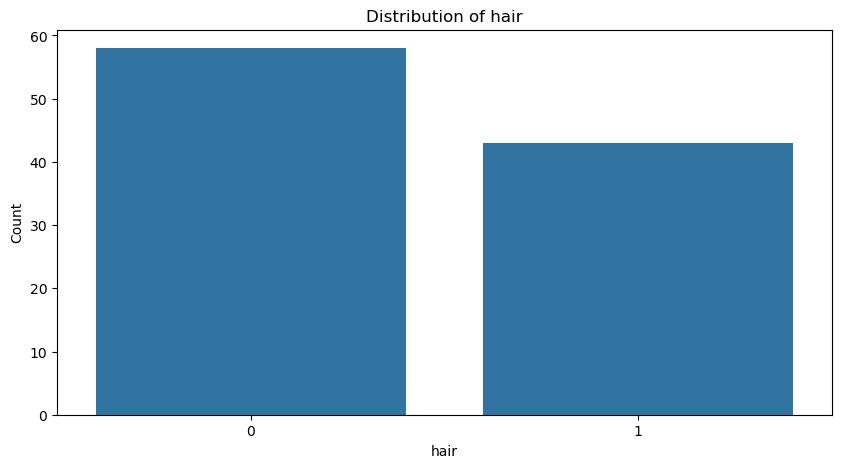

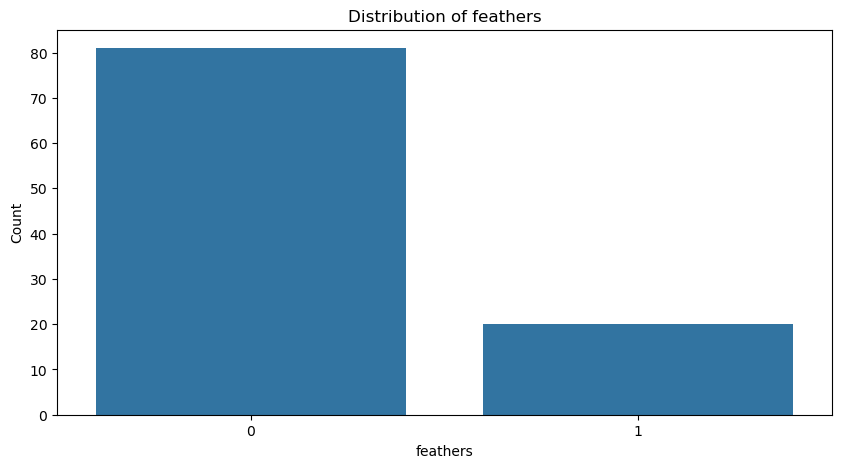

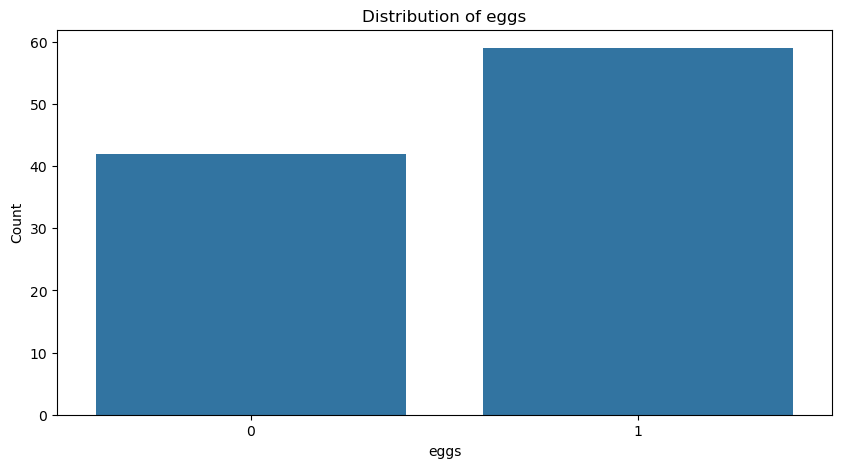

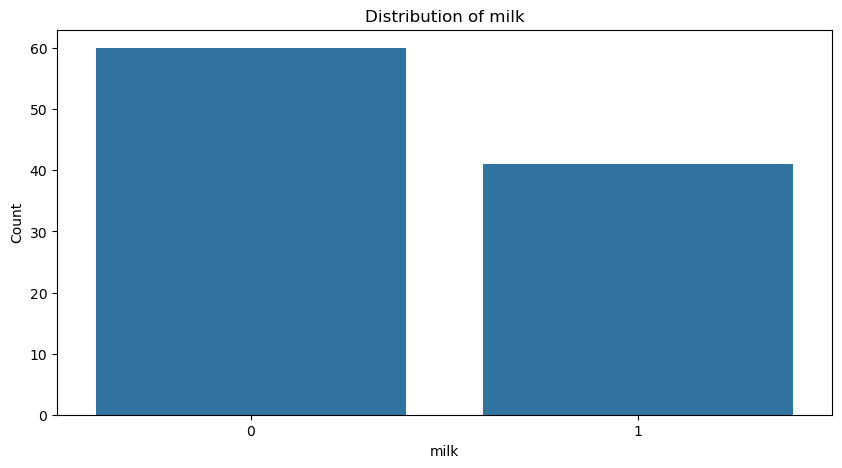

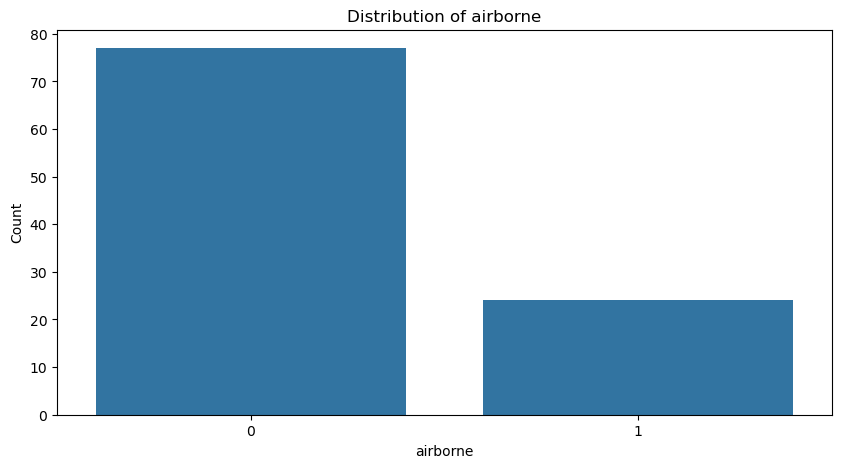

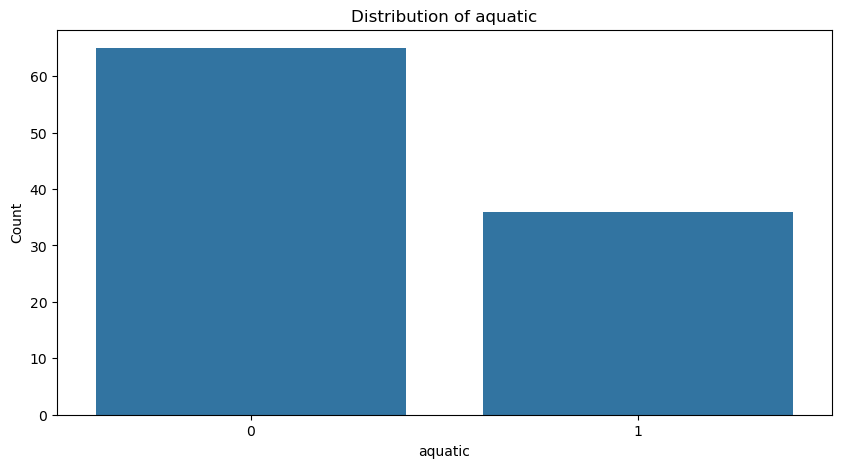

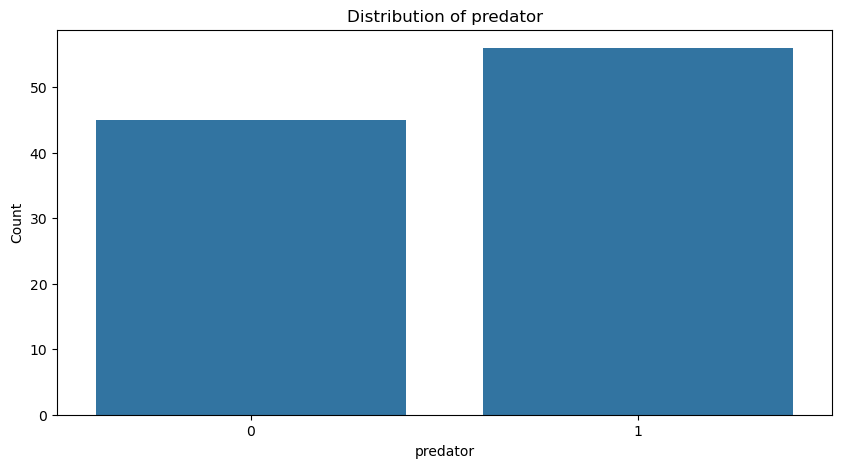

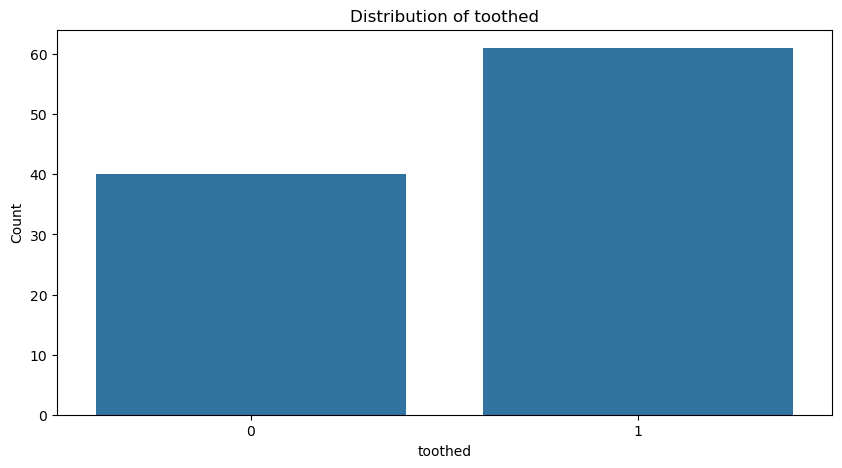

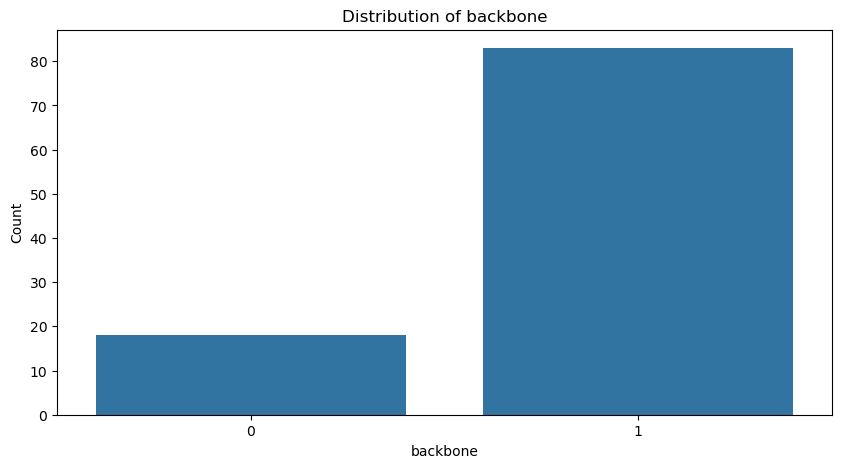

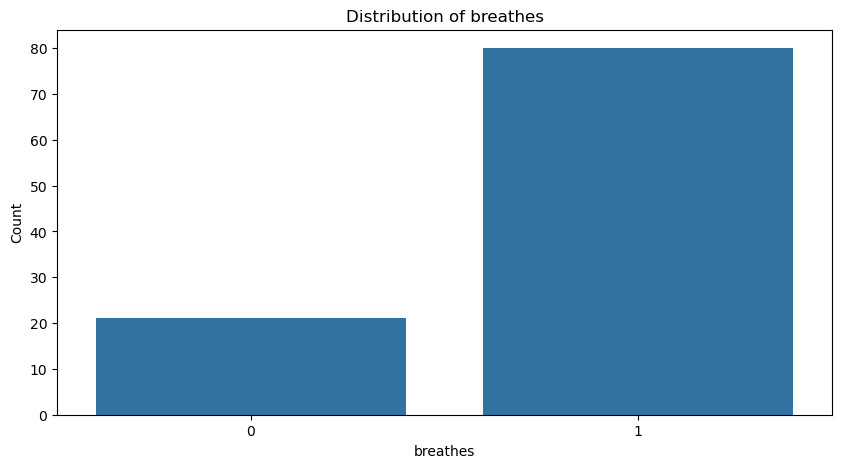

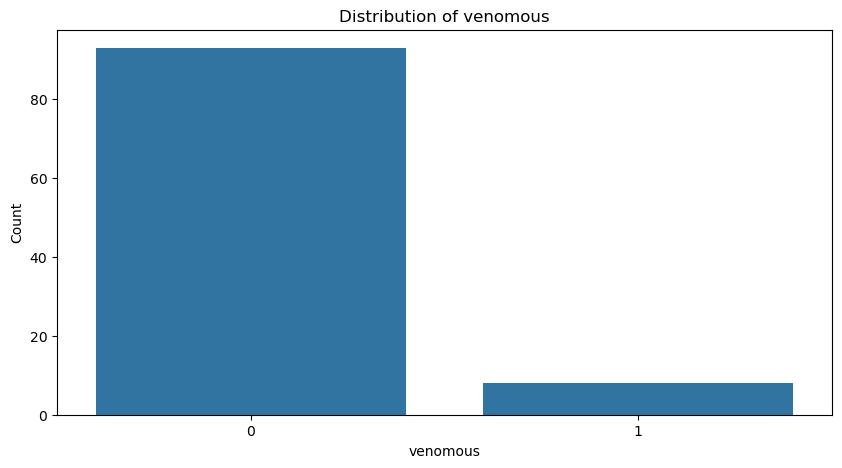

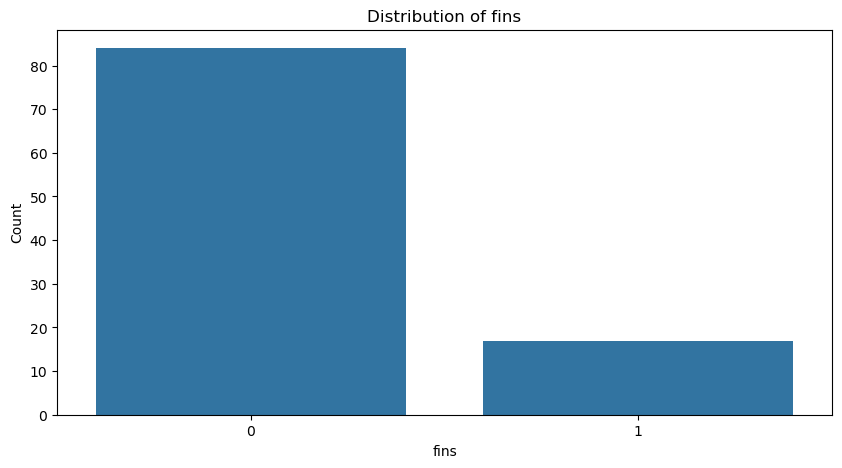

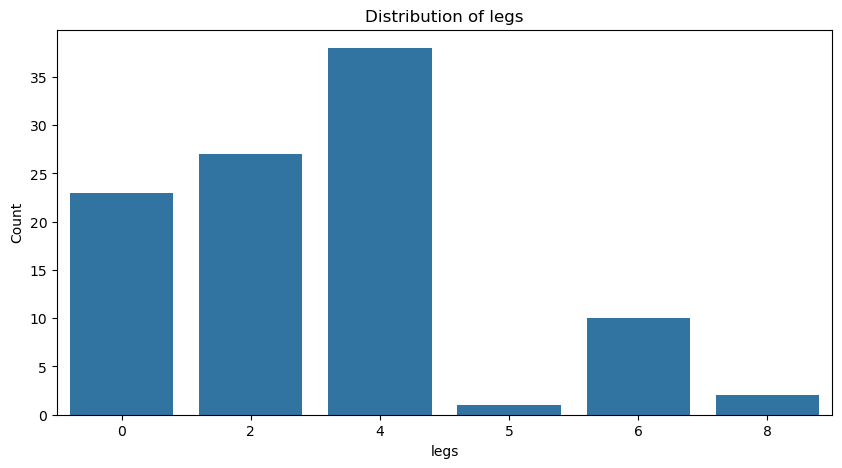

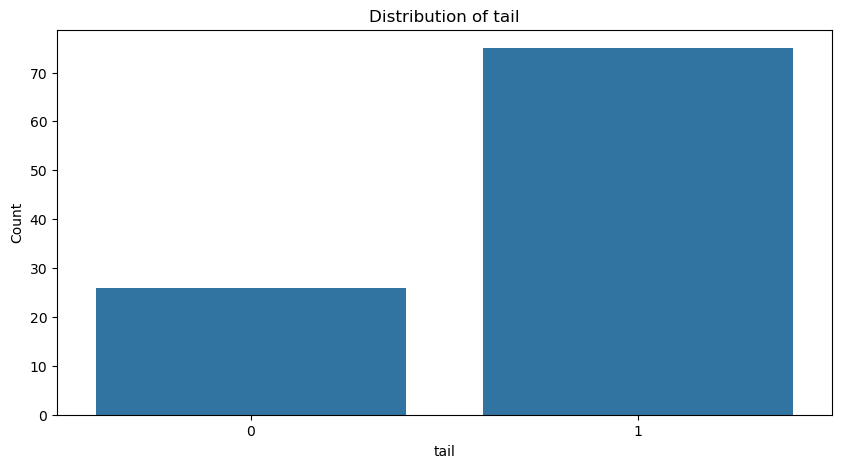

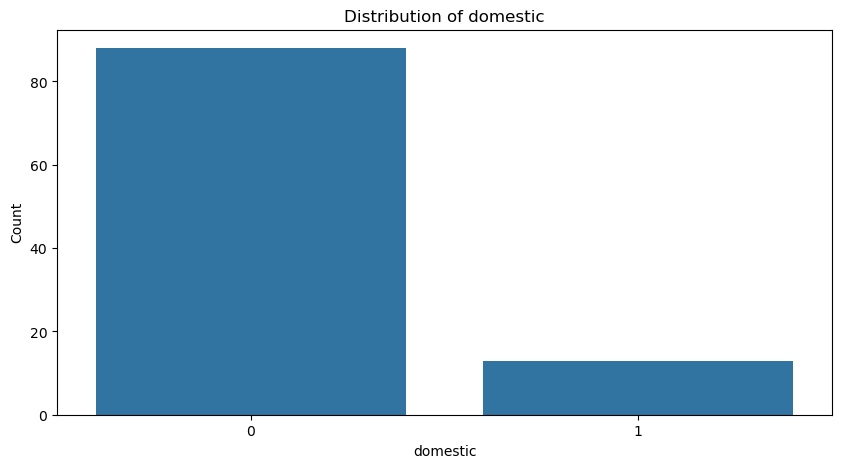

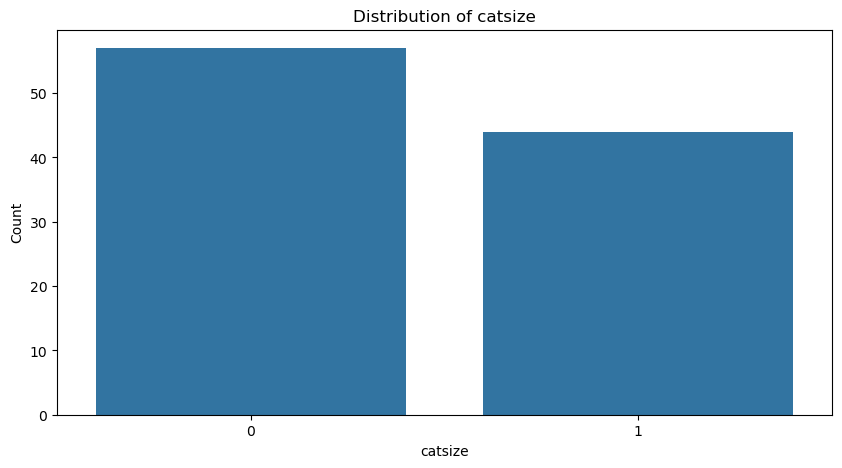

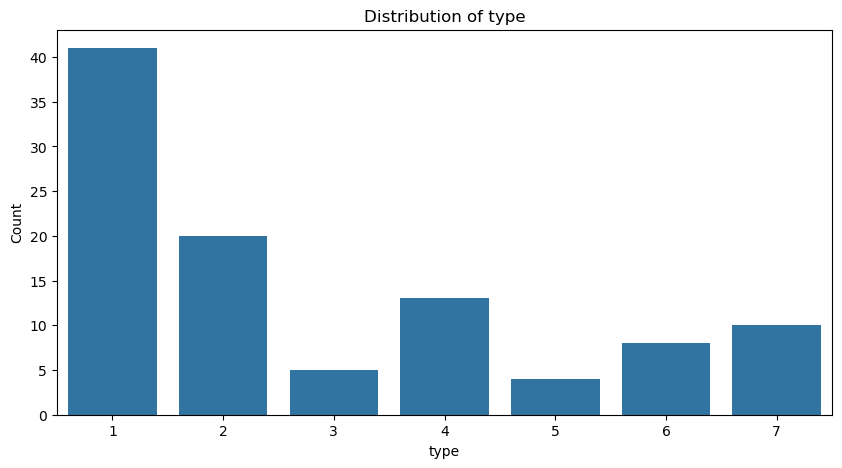

In [139]:
# Visualizing: Making Barplots for all the variables
import ipywidgets as widgets
from IPython.display import display

# Create a container widget with a vertical box layout
output_container = widgets.VBox()

# Loop through each categorical variable and create a bar plot
for var in categorical_vars:
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.countplot(data=df, x=var, ax=ax)
    ax.set_title(f'Distribution of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')
    
    # Create a widget to hold the figure
    fig_canvas = widgets.Output()
    with fig_canvas:
        display(fig)
    
# Append the widget to the container
output_container.children += (fig_canvas,)

# Create a scrollable widget for the container
scrollable_output = widgets.VBox([output_container])
scrollable_output.layout = widgets.Layout


In [ ]:
# 4: KNN Model Implementation:

In [140]:
# Building the model
x=df.drop('type',axis='columns')
y=df['type']

In [142]:
# Splitting the dataset into the Training set and Test set using 80:20 split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2,random_state=42)

In [160]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [162]:
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

In [176]:
# Predicting:
ypred=knn.predict(xtest)
ypred

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 4],
      dtype=int64)

In [178]:
knn.score(xtest,ytest)

0.9523809523809523

In [180]:
# Plot Confusion Matrix:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest, ypred)
cm

array([[12,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  1]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

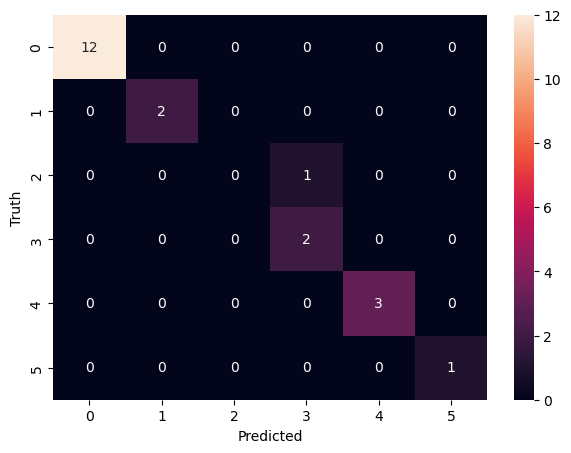

In [182]:
# Visualizing:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [184]:
# Metrics:
# Print classification report for precesion, recall and f1-score for each classes
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



D:\Coding\DS\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Coding\DS\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Coding\DS\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [188]:
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [192]:
# To visualize decision boundaries we use pca:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [194]:
# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

# Split the PCA-transformed data
xtrain, xtest, ytrain, ytest = train_test_split(x_pca, y, test_size=0.2, random_state=42)

In [ ]:
# Fit the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, ytrain)

In [ ]:
# Visualize using Meshgrid:
# Create a meshgrid
x_min, x_max = x_pca[:, 0].min() - 1, x_pca[:, 0].max() + 1
y_min, y_max = x_pca[:, 1].min() - 1, x_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict on meshgrid points
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, edgecolor='k', marker='o')
plt.title('KNN Decision Boundaries (PCA-reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
Conclusion:
We have used knn classifier to predict animal class and visualized its decision boundaries using 